In [35]:
from selenium import webdriver
from bs4 import BeautifulSoup
from selenium.webdriver.common.keys import Keys
import time
import pyperclip
import urllib
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [36]:
options = webdriver.ChromeOptions()
options.add_experimental_option("excludeSwitches", ["enable-logging"])

path = '/Users/재욱/Downloads/chromedriver'
driver = webdriver.Chrome(path, options=options)
# driver.implicitly_wait(3)

driver.get('https://www.naver.com/')
time.sleep(1)
# send_keys 방법이 Capture system 에 막힘
# driver.find_element_by_name('id').send_keys('dlsdj132')
# driver.find_element_by_name('pw').send_keys('qkekrkwk132')

xpath = '//a[@class="link_login"]'
xpath_id = '//input[@id="id"]'
xpath_pw = '//input[@id="pw"]'
xpath_login = '//input[@id="log.login"]'

my_id = 'dlsdj132'
my_pw = 'qkekrkwk132'

# 로그인 클릭
driver.find_element_by_xpath(xpath).click()
# id 복사 및 붙여넣기
pyperclip.copy(my_id)
driver.find_element_by_xpath(xpath_id).send_keys(Keys.CONTROL, 'v')
# pw 복사 및 붙여넣기
pyperclip.copy(my_pw)
driver.find_element_by_xpath(xpath_pw).send_keys(Keys.CONTROL, 'v')
# 로그인 클릭
driver.find_element_by_xpath(xpath_login).click()
time.sleep(1)

In [37]:
print(type(xpath_item))
print(type(division))
print(type(item_list))

<class 'str'>
<class 'selenium.webdriver.remote.webelement.WebElement'>
<class 'list'>


In [38]:
# NAVER Pay 접속 
driver.get('https://order.pay.naver.com/home')

xpath_item = '//*[@id="_listContentArea"]'
division = driver.find_element_by_xpath(xpath_item)
item_list = division.find_elements_by_tag_name('li')

# Item별 ID 속성을 list로 정리
item_id_list = []
for item in item_list:
    
    id = item.get_attribute('id')
    if id != '':
        item_id_list.append(id)
from pprint import pprint
pprint(item_id_list)

['_rowLi20210624192803CHK2021062435863661',
 '_rowLi20210617201401CHK2021061784192931',
 '_rowLi20210617165910CHK2021061779375911',
 '_rowLi20210611155958CHK2021061165235171',
 '_rowLi20210607120928CHK2021060790228611',
 '_rowLi20210406050148CHK2021040690776871',
 '_rowLi20210406050148CHK2021040690776861',
 '_rowLi20210404194806CHK2021040438917311',
 '_rowLi20210404194806CHK2021040438917301',
 '_rowLi20210404194806CHK2021040438917291',
 '_rowLi20210404194806CHK2021040438917281',
 '_rowLi20210404194806CHK2021040438917271',
 '_rowLi20210404194806CHK2021040438917261',
 '_rowLi20210403200244CHK2021040313188921',
 '_rowLi20210207175918CHK2021020769425131']


In [4]:
def url_to_image(url):
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    
    return image

In [39]:
image_list = division.find_elements_by_tag_name('img')

for image in image_list:
    print(image.get_attribute('src')) # class 는 str
    
item_image = url_to_image(image.get_attribute('src'))
print(item_image.shape)

https://order.pay.naver.com/proxy/phinf/shop1/20210303_89/1614738838043b9Eop_PNG/15874671840529965_106342422.png?type=m90_90
https://order.pay.naver.com/proxy/phinf/shop1/20210616_246/1623834498277V5EM7_JPEG/24970281970222235_1252524171.jpg?type=m90_90
https://order.pay.naver.com/proxy/phinf/shop1/20210210_137/1612920796001T2Bn7_PNG/14056684687878733_1712388147.png?type=m90_90
https://order.pay.naver.com/proxy/phinf/shop1/20210426_263/1619409644772gqRUV_PNG/20545478549975473_1360353111.PNG?type=m90_90
https://order.pay.naver.com/proxy/phinf/shop1/20210603_254/1622706841704QXlDC_JPEG/23842684386691767_1677937167.jpg?type=m90_90
https://order.pay.naver.com/proxy/phinf/shop1/20201005_289/1601825310406RUkuN_JPEG/2961156122271042_890915781.jpg?type=m90_90
https://order.pay.naver.com/proxy/phinf/shop1/20201201_99/16068237534644f2Iq_JPEG/7959533183170982_344390475.jpg?type=m90_90
https://order.pay.naver.com/proxy/phinf/shop1/20200610_112/1591757059025Arb4I_JPEG/29116893565381541_376685099.jpg

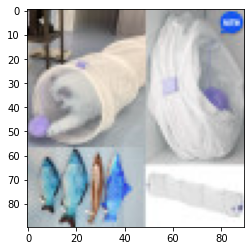

In [81]:
plt.imshow(item_image) # 마지막 image만 보여줌
plt.show()

In [32]:
# OpenCV image 출력
for image in image_list:
    item_image = url_to_image(image.get_attribute('src'))
    cv2.imshow("item",item_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [40]:
# image의 src속성(url)을 받아서 naver_img 폴더에 다운로드
i = 1
for image in image_list:
    with urllib.request.urlopen(image.get_attribute('src')) as f:
        with open('./naver_img/' + str(i) +'.jpg','wb') as h:
            img = f.read()
            h.write(img)
    i+=1
print('Download Completed!')

Download Completed!


In [18]:
print(driver.find_element_by_xpath(xpath_item).text)

2021.06
NSR 클럽 팬덤2 긴팔 여름 자전거 라이딩저지 우먼져지 자전거복 여성상의
120,650원
2021.06.24
구매확정
구매가 완료되었습니다. 이용해주셔서 감사합니다.
구매확정 이후 상품의 이용방법, 반품 등에 대한 문의는 판매자에게 문의해주세요.
NSR정서진
032-566-1580
문의하기
재구매

락브로스 새들백 자전거 레일형 하드케이스 방수 안장가방 A46
4,900원
2021.06.17
구매확정
구매가 완료되었습니다. 이용해주셔서 감사합니다.
구매확정 이후 상품의 이용방법, 반품 등에 대한 문의는 판매자에게 문의해주세요.
다빈치바이씨클
010-8894-0955
문의하기
재구매

NSR 뉴센스 자전거 라이딩 긴팔 nsr저지 자전거져지 라이딩복 자전거복 상의 우먼 여름
85,780원
2021.06.17
반품환불완료
환불처리가 완료되었습니다. [반품정보]버튼을 눌러 상세내용을 확인하세요.
NSR정서진
032-566-1580
문의하기
반품정보
홍진 HJC 퓨리온2.0 아이벡스 2.0 에어로 로드 라이딩 초경량 싸이클 자전거 헬멧
228,000원
2021.06.11
구매확정
구매가 완료되었습니다. 이용해주셔서 감사합니다.
구매확정 이후 상품의 이용방법, 반품 등에 대한 문의는 판매자에게 문의해주세요.
NSR정서진
032-566-1580
문의하기
재구매

2021년 NEW 홍진 HJC 퓨리온 아이벡스 2.0 자전거 에어로 헬멧
248,000원
2021.06.07
반품환불완료
환불처리가 완료되었습니다. [반품정보]버튼을 눌러 상세내용을 확인하세요.
다빈치바이씨클
010-8894-0955
문의하기
반송조회
반품정보
2021.04
컨티넨탈 레이스킹 쉴드월 MTB 산악 자전거 타이어 26, 27.5, 29인치 CONTINENTAL RACE KING 클린처 튜블리스
37,500원
2021.04.06
구매확정
구매가 완료되었습니다. 이용해주셔서 감사합니다.
구매확정 이후 상품의 이용방법, 반품 등에 대한 문의는 판매자에게 문의해주세요.
케이팩토리
010-970

In [19]:
len(driver.find_element_by_xpath(xpath_item).text)

2523

In [33]:
print(type(driver.find_element_by_xpath(xpath_item).text))
print(xpath_item)
print(type(xpath_item))

<class 'str'>
//*[@id="_listContentArea"]
<class 'str'>


In [30]:
type(driver.find_element_by_xpath(xpath_item))

selenium.webdriver.remote.webelement.WebElement

In [26]:
item_list1 = division.find_elements_by_tag_name('li')
print(type(item_list1))
print(division)

<class 'list'>
<selenium.webdriver.remote.webelement.WebElement (session="b1a3cfc05ba4c912051d0fcedd5e074f", element="093d26ec-9927-46bd-914c-1846db08ab26")>


In [33]:
for item in item_list1:
    print(item.get_attribute('id'))
    
print(type(item)) # class selenium.webdriver.remote.webelement.WebElement
print(item)
print(type(item.get_attribute)) # class method
print(type(item.get_attribute('id'))) # class str

NameError: name 'item_list1' is not defined